In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('car_data/car data.csv')

In [3]:
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Data Preprocessing

### Check unique categorical values

In [5]:
for col in ('Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'):
    print(col)
    print(df[col].unique())

Fuel_Type
['Petrol' 'Diesel' 'CNG']
Seller_Type
['Dealer' 'Individual']
Transmission
['Manual' 'Automatic']
Owner
[0 1 3]


### Check null value

In [6]:
# Check null value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
final_data = df[df.columns[1:]]

In [8]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
final_data['old']= 2020-final_data['Year']

In [10]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [11]:
final_data.drop(['Year'], axis=1, inplace=True)

In [12]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [13]:
final_data= pd.get_dummies(final_data, drop_first=True)

In [15]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


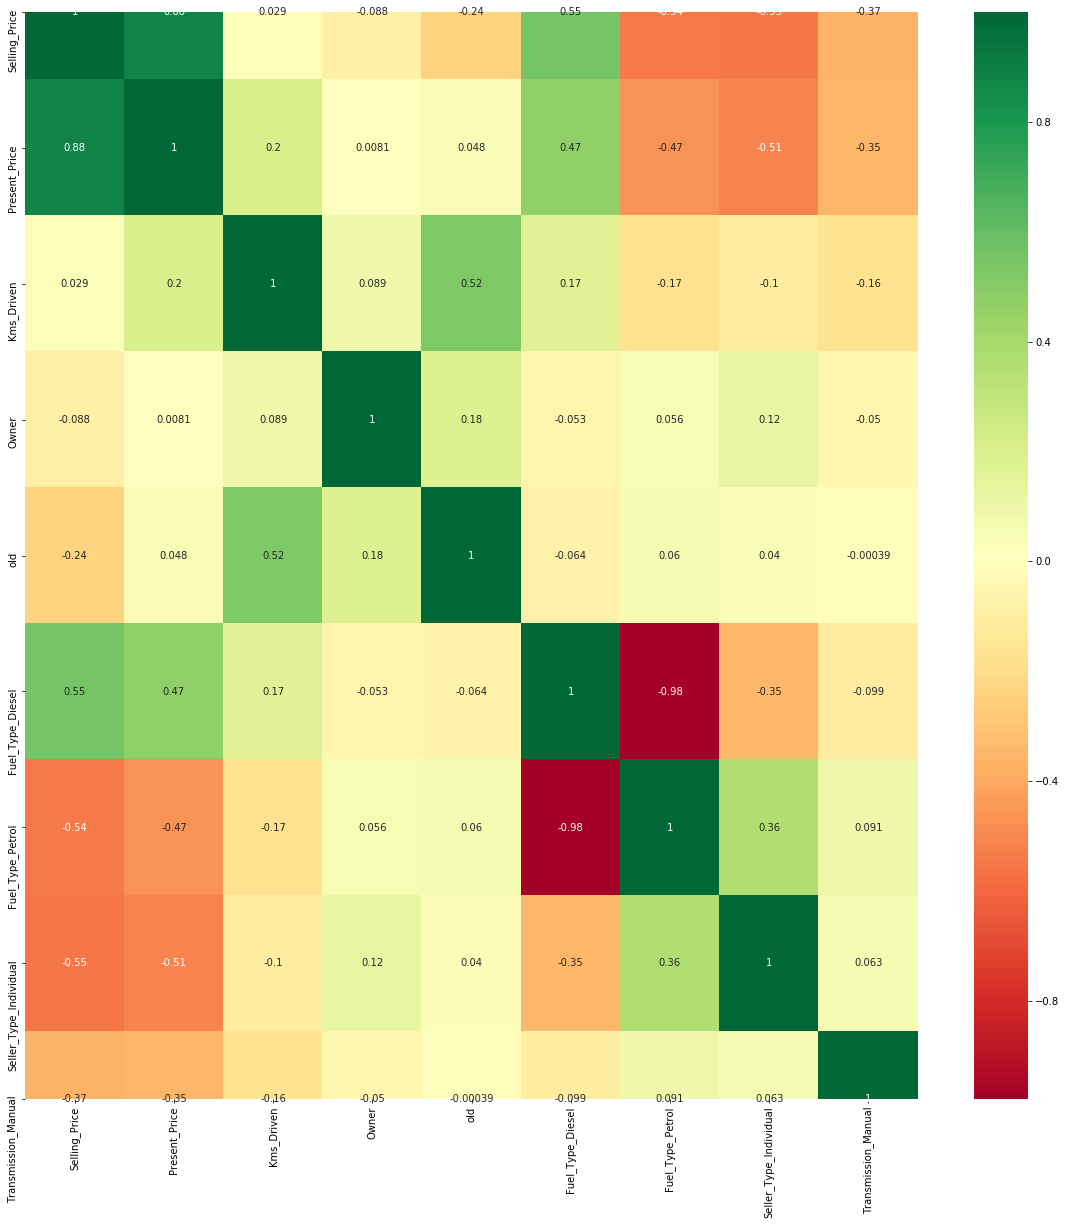

In [25]:
correlation_mat= final_data.corr()
top_corr_features = correlation_mat.index
plt.figure(figsize=(20,20))
heatmap= sns.heatmap(final_data[top_corr_features].corr(),annot=True, cmap="RdYlGn")

In [26]:
X= final_data.iloc[:, 1:]
y= final_data.iloc[:,0]

In [28]:
X.head()


,Present_Price,Kms_Driven,Owner,old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


### Feature Importance

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[4.11950503e-01 4.45018199e-02 2.97869220e-04 8.20867765e-02
 2.14612546e-01 1.36609646e-02 9.28170550e-02 1.40072466e-01]


/home/tnahsoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


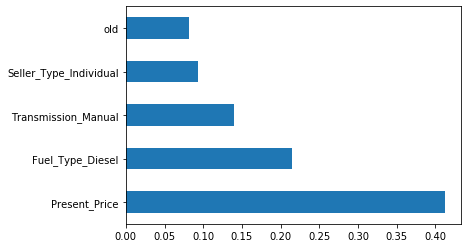

In [30]:
#plot important feature
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.nlargest(5).plot(kind='barh')
plt.show()

In [31]:
feature_imp.nlargest(5)

Present_Price             0.411951
Fuel_Type_Diesel          0.214613
Transmission_Manual       0.140072
Seller_Type_Individual    0.092817
old                       0.082087
dtype: float64

## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [34]:
X_train.shape

(225, 8)

## Modeling

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_predicted = model.predict(X_test)

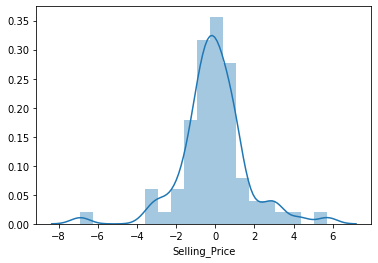

In [39]:
sns.distplot(y_test-y_predicted)

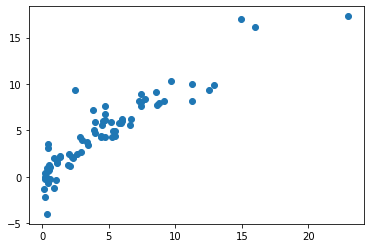

In [40]:
plt.scatter(y_test, y_predicted)

In [51]:
import joblib
joblib.dump(model, 'linear-regressor.joblib')

['linear-regressor.joblib']

In [54]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [ 4.37822226e-01 -5.04989228e-06  3.55790457e-01 -4.24397399e-01
  2.33856511e+00  5.64306826e-01 -1.14252408e+00 -1.68889903e+00]
Intercept:  5.16692908849024


In [57]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predicted - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predicted - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_predicted) )

Mean absolute error: 1.16
Residual sum of squares (MSE): 2.92
R2-score: 0.84
